In [1]:
import os
import folderstats
import matplotlib.pyplot as plt
import squarify
import numpy as np
import datetime

folder = '/home/arnold/raindrop-detection-cnn/ALL/'
filepaths = [os.path.join(folder, f) for f in os.listdir(folder)]

#print(os.stat(folder))

df = folderstats.folderstats(folder, ignore_hidden=True)
df.head()
#only look at folders
df_folder = df[df['folder']]
df_folder[['name', 'num_files']]


,name,num_files
814,rain,814.0
7436,overcast,6621.0
12258,clear,4821.0
33891,few,21632.0
43244,scattered,9352.0
44494,night,1249.0
44806,snow,310.0
44807,,44800.0


In [3]:
#find folders
#df[df['folder']]

#drop broken rows
df_folder = df_folder.drop(index=44807, axis=0)
# df_folder.head()

In [4]:
cloud_num = df_folder[['name', 'num_files']]
cloud_num = cloud_num.set_index('name')
cloud_num

,num_files
name,
rain,814.0
overcast,6621.0
clear,4821.0
few,21632.0
scattered,9352.0
night,1249.0
snow,310.0


In [5]:
# date_time_str = '20151207T125501'
# date_time_obj = datetime.datetime.strptime(date_time_str, '%Y%m%dT%H%M%S')

# print('Date:', date_time_obj.date())
# print('Time:', date_time_obj.time())
# print('Date-time:', date_time_obj)

#drop all folders
df.drop(df.loc[df['folder']==True].index, inplace=True)
df.head()
# df[df['folder']]

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,3,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20170426T153026_VOOR,jpg,78365,2020-10-16 19:24:40,2020-10-01 23:01:33,2020-10-16 19:24:40,False,NaN,1,2,1000
1,4,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20190408T105527_BKLN,jpg,82270,2020-10-20 20:03:02,2020-10-20 19:24:44,2020-10-20 20:21:55,False,NaN,1,2,0
2,5,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20190124T153027_BKLN,jpg,67006,2020-10-20 19:09:05,2020-10-20 17:52:34,2020-10-20 19:35:48,False,NaN,1,2,0
3,6,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151227T163001_ESSX,jpg,89871,2020-10-16 15:40:55,2020-10-06 17:44:57,2020-10-16 15:40:04,False,NaN,1,2,1000
4,7,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151216T121501_ESSX,jpg,91148,2020-10-16 17:52:12,2020-10-06 17:46:02,2020-10-16 16:41:03,False,NaN,1,2,1000


In [6]:
#get cloud type and make a new column for it
# cloud_type = df["path"].str.split("raindrop-detection-cnn/", n=1, expand = True)
# cloud_type.head()
#not working ffor some reason
# for i in range(0, len(df)): 
#     df.iloc[i].path = df.iloc[i].path[17:-1] 

# df['path'] = df['path'].str.slice(17, -1)     
# df.head()
cloud_type = df['path'].str.slice(41, -4)  
df['path'] = cloud_type
# new data frame with split value columns to seperate time from name
new_split = df["path"].str.split("/", n = 1, expand = True) 
df['cloud'] = new_split[0]
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud
0,3,ain/20170426T153026_VOOR,20170426T153026_VOOR,jpg,78365,2020-10-16 19:24:40,2020-10-01 23:01:33,2020-10-16 19:24:40,False,NaN,1,2,1000,ain
1,4,ain/20190408T105527_BKLN,20190408T105527_BKLN,jpg,82270,2020-10-20 20:03:02,2020-10-20 19:24:44,2020-10-20 20:21:55,False,NaN,1,2,0,ain
2,5,ain/20190124T153027_BKLN,20190124T153027_BKLN,jpg,67006,2020-10-20 19:09:05,2020-10-20 17:52:34,2020-10-20 19:35:48,False,NaN,1,2,0,ain
3,6,ain/20151227T163001_ESSX,20151227T163001_ESSX,jpg,89871,2020-10-16 15:40:55,2020-10-06 17:44:57,2020-10-16 15:40:04,False,NaN,1,2,1000,ain
4,7,ain/20151216T121501_ESSX,20151216T121501_ESSX,jpg,91148,2020-10-16 17:52:12,2020-10-06 17:46:02,2020-10-16 16:41:03,False,NaN,1,2,1000,ain


In [7]:
# new data frame with split value columns to seperate time from name
new_split = df["path"].str.split("/", n = 1, expand = True) 
df['cloud'] = new_split[0]
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud
0,3,ain/20170426T153026_VOOR,20170426T153026_VOOR,jpg,78365,2020-10-16 19:24:40,2020-10-01 23:01:33,2020-10-16 19:24:40,False,NaN,1,2,1000,ain
1,4,ain/20190408T105527_BKLN,20190408T105527_BKLN,jpg,82270,2020-10-20 20:03:02,2020-10-20 19:24:44,2020-10-20 20:21:55,False,NaN,1,2,0,ain
2,5,ain/20190124T153027_BKLN,20190124T153027_BKLN,jpg,67006,2020-10-20 19:09:05,2020-10-20 17:52:34,2020-10-20 19:35:48,False,NaN,1,2,0,ain
3,6,ain/20151227T163001_ESSX,20151227T163001_ESSX,jpg,89871,2020-10-16 15:40:55,2020-10-06 17:44:57,2020-10-16 15:40:04,False,NaN,1,2,1000,ain
4,7,ain/20151216T121501_ESSX,20151216T121501_ESSX,jpg,91148,2020-10-16 17:52:12,2020-10-06 17:46:02,2020-10-16 16:41:03,False,NaN,1,2,1000,ain


In [8]:
# dropping null value columns to avoid errors 
# data.dropna(inplace = True) 
  
# new data frame with split value columns to seperate time from name
new = df["name"].str.split("_", n = 1, expand = True) 
# print(new)
# making separate date column from new data frame and merge into orignal df
df["date"]= new[0] 
  
# making separate name column from new data frame and merge into orignal df
df["site_name"]= new[1] 
  
# Dropping old Name columns 
df.drop(columns =["name"], inplace = True) 
  
# df display 
df 

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud,date,site_name
0,3,ain/20170426T153026_VOOR,jpg,78365,2020-10-16 19:24:40,2020-10-01 23:01:33,2020-10-16 19:24:40,False,NaN,1,2,1000,ain,20170426T153026,VOOR
1,4,ain/20190408T105527_BKLN,jpg,82270,2020-10-20 20:03:02,2020-10-20 19:24:44,2020-10-20 20:21:55,False,NaN,1,2,0,ain,20190408T105527,BKLN
2,5,ain/20190124T153027_BKLN,jpg,67006,2020-10-20 19:09:05,2020-10-20 17:52:34,2020-10-20 19:35:48,False,NaN,1,2,0,ain,20190124T153027,BKLN
3,6,ain/20151227T163001_ESSX,jpg,89871,2020-10-16 15:40:55,2020-10-06 17:44:57,2020-10-16 15:40:04,False,NaN,1,2,1000,ain,20151227T163001,ESSX
4,7,ain/20151216T121501_ESSX,jpg,91148,2020-10-16 17:52:12,2020-10-06 17:46:02,2020-10-16 16:41:03,False,NaN,1,2,1000,ain,20151216T121501,ESSX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44801,44804,now/20180302T193029_VOOR,jpg,18743,2020-10-16 19:25:00,2020-10-01 17:18:10,2020-10-16 19:25:00,False,NaN,1,44498,1000,now,20180302T193029,VOOR
44802,44805,now/20190322T110527_BKLN,jpg,47819,2020-10-20 20:02:55,2020-10-20 19:18:50,2020-10-20 20:16:38,False,NaN,1,44498,0,now,20190322T110527,BKLN
44803,44806,now/20180302T163029_VOOR,jpg,19671,2020-10-16 19:25:00,2020-10-01 17:17:52,2020-10-16 19:25:00,False,NaN,1,44498,1000,now,20180302T163029,VOOR
44804,44807,now/20190302T105026_BKLN,jpg,41602,2020-10-20 19:17:17,2020-10-20 19:17:17,2020-10-20 19:17:17,False,NaN,1,44498,0,now,20190302T105026,BKLN


In [9]:
import pandas as pd

# converting the string to datetime format 
# df['Dates'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S') 
df['Dates'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S') 
df.head()

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud,date,site_name,Dates
0,3,ain/20170426T153026_VOOR,jpg,78365,2020-10-16 19:24:40,2020-10-01 23:01:33,2020-10-16 19:24:40,False,NaN,1,2,1000,ain,20170426T153026,VOOR,2017-04-26 15:30:26
1,4,ain/20190408T105527_BKLN,jpg,82270,2020-10-20 20:03:02,2020-10-20 19:24:44,2020-10-20 20:21:55,False,NaN,1,2,0,ain,20190408T105527,BKLN,2019-04-08 10:55:27
2,5,ain/20190124T153027_BKLN,jpg,67006,2020-10-20 19:09:05,2020-10-20 17:52:34,2020-10-20 19:35:48,False,NaN,1,2,0,ain,20190124T153027,BKLN,2019-01-24 15:30:27
3,6,ain/20151227T163001_ESSX,jpg,89871,2020-10-16 15:40:55,2020-10-06 17:44:57,2020-10-16 15:40:04,False,NaN,1,2,1000,ain,20151227T163001,ESSX,2015-12-27 16:30:01
4,7,ain/20151216T121501_ESSX,jpg,91148,2020-10-16 17:52:12,2020-10-06 17:46:02,2020-10-16 16:41:03,False,NaN,1,2,1000,ain,20151216T121501,ESSX,2015-12-16 12:15:01


In [10]:
#create a new column with year of date field
df['year'] = pd.DatetimeIndex(df['date']).year
#create a new column with month of date field
df['month'] = pd.DatetimeIndex(df['date']).month
#since we have datetime obj, can extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,cloud,date,site_name,Dates,year,month,month_year
0,3,ain/20170426T153026_VOOR,jpg,78365,2020-10-16 19:24:40,2020-10-01 23:01:33,2020-10-16 19:24:40,False,NaN,1,2,1000,ain,20170426T153026,VOOR,2017-04-26 15:30:26,2017,4,2017-04
1,4,ain/20190408T105527_BKLN,jpg,82270,2020-10-20 20:03:02,2020-10-20 19:24:44,2020-10-20 20:21:55,False,NaN,1,2,0,ain,20190408T105527,BKLN,2019-04-08 10:55:27,2019,4,2019-04
2,5,ain/20190124T153027_BKLN,jpg,67006,2020-10-20 19:09:05,2020-10-20 17:52:34,2020-10-20 19:35:48,False,NaN,1,2,0,ain,20190124T153027,BKLN,2019-01-24 15:30:27,2019,1,2019-01
3,6,ain/20151227T163001_ESSX,jpg,89871,2020-10-16 15:40:55,2020-10-06 17:44:57,2020-10-16 15:40:04,False,NaN,1,2,1000,ain,20151227T163001,ESSX,2015-12-27 16:30:01,2015,12,2015-12
4,7,ain/20151216T121501_ESSX,jpg,91148,2020-10-16 17:52:12,2020-10-06 17:46:02,2020-10-16 16:41:03,False,NaN,1,2,1000,ain,20151216T121501,ESSX,2015-12-16 12:15:01,2015,12,2015-12


In [11]:
#drop cols that are not needed
# Dropping old Name columns 
df.drop(columns =["id", "extension", "atime", "mtime", "ctime", "folder", "depth", "parent", "uid"], inplace = True) 
df.head()

,path,size,num_files,cloud,date,site_name,Dates,year,month,month_year
0,ain/20170426T153026_VOOR,78365,NaN,ain,20170426T153026,VOOR,2017-04-26 15:30:26,2017,4,2017-04
1,ain/20190408T105527_BKLN,82270,NaN,ain,20190408T105527,BKLN,2019-04-08 10:55:27,2019,4,2019-04
2,ain/20190124T153027_BKLN,67006,NaN,ain,20190124T153027,BKLN,2019-01-24 15:30:27,2019,1,2019-01
3,ain/20151227T163001_ESSX,89871,NaN,ain,20151227T163001,ESSX,2015-12-27 16:30:01,2015,12,2015-12
4,ain/20151216T121501_ESSX,91148,NaN,ain,20151216T121501,ESSX,2015-12-16 12:15:01,2015,12,2015-12


In [12]:
#make month_year the index
df = df.set_index('month_year')
df.head()


,path,size,num_files,cloud,date,site_name,Dates,year,month
month_year,,,,,,,,,
2017-04,ain/20170426T153026_VOOR,78365,NaN,ain,20170426T153026,VOOR,2017-04-26 15:30:26,2017,4
2019-04,ain/20190408T105527_BKLN,82270,NaN,ain,20190408T105527,BKLN,2019-04-08 10:55:27,2019,4
2019-01,ain/20190124T153027_BKLN,67006,NaN,ain,20190124T153027,BKLN,2019-01-24 15:30:27,2019,1
2015-12,ain/20151227T163001_ESSX,89871,NaN,ain,20151227T163001,ESSX,2015-12-27 16:30:01,2015,12
2015-12,ain/20151216T121501_ESSX,91148,NaN,ain,20151216T121501,ESSX,2015-12-16 12:15:01,2015,12


In [13]:
cloud_num.loc['rain']

num_files    814.0
Name: rain, dtype: float64

In [14]:
#add num files from cloud_num into df
#works for single condition
# df['num_files'] = np.where(df['cloud']== 'rain', cloud_num.loc['rain'], False)
df['num_files'] = np.where(df['cloud']== 'rain', cloud_num.loc['rain'], 
                           np.where(df['cloud']== 'overcast', cloud_num.loc['overcast'], 
                                    np.where(df['cloud']== 'clear', cloud_num.loc['clear'], 
                                             np.where(df['cloud']== 'few', cloud_num.loc['few'], 
                                                      np.where(df['cloud']== 'scattered', cloud_num.loc['scattered'], 
                                                               np.where(df['cloud']== 'night', cloud_num.loc['night'], 
                                                                        np.where(df['cloud']== 'snow', cloud_num.loc['snow'], False)))))))

In [15]:
df

,path,size,num_files,cloud,date,site_name,Dates,year,month
month_year,,,,,,,,,
2017-04,ain/20170426T153026_VOOR,78365,0.0,ain,20170426T153026,VOOR,2017-04-26 15:30:26,2017,4
2019-04,ain/20190408T105527_BKLN,82270,0.0,ain,20190408T105527,BKLN,2019-04-08 10:55:27,2019,4
2019-01,ain/20190124T153027_BKLN,67006,0.0,ain,20190124T153027,BKLN,2019-01-24 15:30:27,2019,1
2015-12,ain/20151227T163001_ESSX,89871,0.0,ain,20151227T163001,ESSX,2015-12-27 16:30:01,2015,12
2015-12,ain/20151216T121501_ESSX,91148,0.0,ain,20151216T121501,ESSX,2015-12-16 12:15:01,2015,12
...,...,...,...,...,...,...,...,...,...
2018-03,now/20180302T193029_VOOR,18743,0.0,now,20180302T193029,VOOR,2018-03-02 19:30:29,2018,3
2019-03,now/20190322T110527_BKLN,47819,0.0,now,20190322T110527,BKLN,2019-03-22 11:05:27,2019,3
2018-03,now/20180302T163029_VOOR,19671,0.0,now,20180302T163029,VOOR,2018-03-02 16:30:29,2018,3


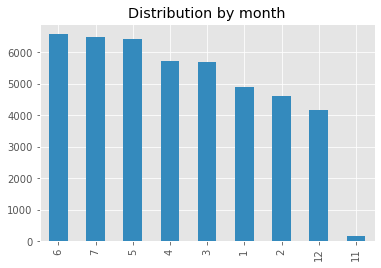

In [16]:
#show distribution by month
with plt.style.context('ggplot'):
    df['month'].value_counts().plot(
        kind='bar', color='C1', title='Distribution by month');

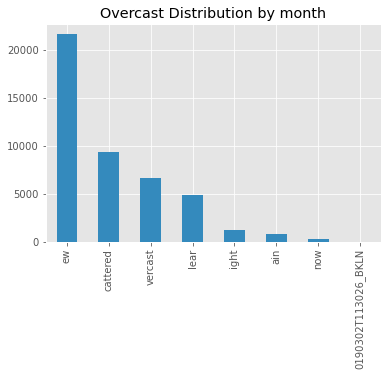

In [17]:
#show distribution by month
with plt.style.context('ggplot'):
    df['cloud'].value_counts().plot(
        kind='bar', color='C1', title='Overcast Distribution by month');

<AxesSubplot:xlabel='month'>

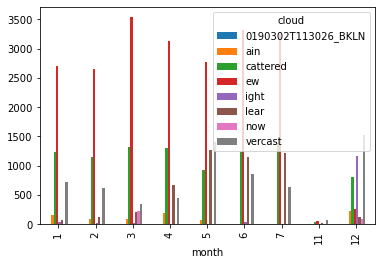

In [18]:
#plotting and saving the plots
df.groupby(['month','cloud']).count()['num_files'].unstack().plot( kind='bar', )

# the plot gets saved to 'output.png'
# plt.savefig('output.png')

In [ ]:
# df[["year", "month", "cloud", "site_name"]].plot(x="year", kind="bar")
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['month']).count()['cloud'].plot(ax=ax)

In [ ]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['month','cloud']).count()['num_files'].unstack().plot(ax=ax)

In [ ]:
df_folder.plot(x='name', y='num_files', kind='bar') 


In [ ]:
#show distribution by file size
with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension 
#     extension_sizes = df.groupby('month')['cloud'].sum()
    extension_sizes = df.groupby('cloud')['month'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)
    
    extension_sizes.plot(
        kind='bar', color='C1', title='Overcast Distribution by month');

In [ ]:
#Tree map

# Group by extension and sum all sizes for each extension
extension_sizes = df.groupby('cloud')['month'].sum()
# Sort elements by size
extension_sizes = extension_sizes.sort_values(ascending=False)

squarify.plot(sizes=extension_sizes.values, label=extension_sizes.index.values)
plt.title('Overcast Treemap by month')
plt.axis('off');

In [ ]:
with plt.style.context('ggplot'):
    # Filter the data set to only folders
    df_folders = df[df['folder']]
    # Set the name to be the index (so we can use it as a label later)
    df_folders.set_index('name', inplace=True)
    # Sort the folders by size
    df_folders = df_folders.sort_values(by='num_files', ascending=False)
    
    # Show the size of the largest 50 folders as a bar plot
    df_sizes['num_files'][:50].plot(kind='bar', color='C0', title='Category # files');

In [ ]:
with plt.style.context('ggplot'):
    y, bins = np.histogram(df['size'], bins=10000)
    plt.loglog(bins[:-1], y, '.');
    plt.ylabel('Size')
    plt.xlabel('Rank')


In [ ]:
import networkx as nx

# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
#nodes (files and folders)
print(nx.info(G))

In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout

pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

In [ ]:
pos_twopi = graphviz_layout(G, prog='twopi', root=1)

fig = plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos_twopi, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_twopi, edge_color='C0', width=0.5)
plt.axis('off')
plt.axis('equal');